In [1]:
import pandas as pd

# Define the file path
file_path = 'data/cleaned_data.csv'

# Load the cleaned data into a DataFrame
cleaned_df = pd.read_csv(file_path)

In [2]:
# Separate the 'published_at' column into separate 'date' and 'time' columns
cleaned_df[['date', 'time']] = cleaned_df['published_at'].str.split(' ', expand=True)

# Print the DataFrame to verify the new columns
cleaned_df

,article_id,source_name,author,title,description,url,published_at,content,category,article,title_sentiment,date,time
0,81664,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral,2023-11-01,03:27:21.000000
1,81667,CNA,"Elizabeth Brownfield, Contributor, \n Elizabet...",nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive,2023-10-27,21:28:48.000000
2,81694,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative,2023-10-04,17:36:18.000000
3,81695,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral,2023-10-31,18:04:02.000000
4,81703,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral,2023-10-23,23:09:18.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58351,781108,The Indian Express,PTI,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,https://indianexpress.com/article/cities/banga...,2023-11-29 10:57:22,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,Neutral,2023-11-29,10:57:22
58352,781129,Forbes,"Tom Sanderson, Senior Contributor, \n Tom Sand...",FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,https://www.forbes.com/sites/tomsanderson/2023...,2023-11-29 08:41:18,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,Neutral,2023-11-29,08:41:18
58353,781235,NPR,Brigid McCarthy,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",https://www.npr.org/2023/11/29/1215016001/heal...,2023-11-29 10:01:12,The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,Negative,2023-11-29,10:01:12
58354,781240,Forbes,"Gary Stern, Contributor, \n Gary Stern, Contri...",Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",https://www.forbes.com/sites/garystern/2023/11...,2023-11-29 13:44:33,Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...,Neutral,2023-11-29,13:44:33


In [3]:


# Step 1: Combine 'title', 'description', and 'body' into a single column 'text'
cleaned_df['text'] = cleaned_df['title'] + ' ' + cleaned_df['description'] + ' ' + cleaned_df['content']

In [4]:
# Create a new DataFrame with 'text' and 'date' columns
df_sentiment = cleaned_df[['text']]

# Print the new DataFrame
df_sentiment

,text
0,superstar chef yannick alléno brings refined f...
1,nice claim top spot in ligue 1 with late win a...
2,amphibians are the world’s most vulnerable spe...
3,image: rusty red waters in madagascar Iron-ric...
4,everything leaving max (formerly hbo max) in n...
...,...
58351,"Have done no wrong, only did party work, says ..."
58352,FC Barcelona Guarantees $77.6 Million Champion...
58353,Three hospitals ignored her gravely ill fiancé...
58354,Kerber’s Farm: Bringing Farm To Table To Manha...


In [5]:
import nltk
nltk.download('punkt')  # Download NLTK data (if not already downloaded)

from textblob import TextBlob

# Your sentiment analysis code here


# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Return polarity score

# Apply sentiment analysis to each text in the DataFrame
df_sentiment['sentiment'] = df_sentiment['text'].apply(analyze_sentiment)

# Print the DataFrame with sentiment scores
print(df_sentiment[['text', 'sentiment']])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gecha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                    text  sentiment
0      superstar chef yannick alléno brings refined f...   0.166667
1      nice claim top spot in ligue 1 with late win a...   0.397059
2      amphibians are the world’s most vulnerable spe...  -0.118030
3      image: rusty red waters in madagascar Iron-ric...   0.000000
4      everything leaving max (formerly hbo max) in n...   0.059091
...                                                  ...        ...
58351  Have done no wrong, only did party work, says ...   0.155510
58352  FC Barcelona Guarantees $77.6 Million Champion...   0.066667
58353  Three hospitals ignored her gravely ill fiancé...  -0.225000
58354  Kerber’s Farm: Bringing Farm To Table To Manha...   0.162121
58355  Tips For Investing In Short-Term Rentals In Du...   0.190000

[58356 rows x 2 columns]


C:\Users\gecha\AppData\Local\Temp\ipykernel_6536\1380470328.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['sentiment'] = df_sentiment['text'].apply(analyze_sentiment)


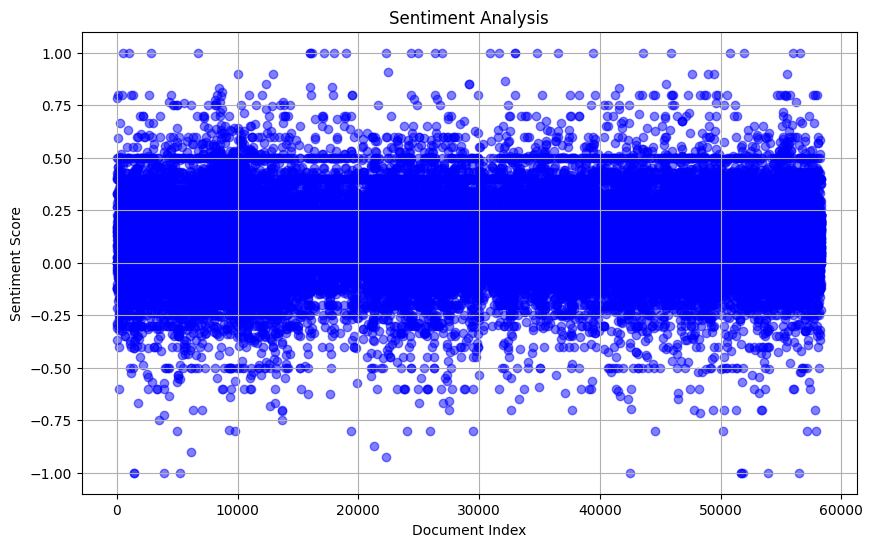

In [6]:
import matplotlib.pyplot as plt

# Assuming you have sentiment scores stored in a list 'sentiment_scores'
sentiment_scores=df_sentiment['sentiment']
# Plot the scatter plot of sentiment scores
plt.figure(figsize=(10, 6))
plt.scatter(range(len(sentiment_scores)), sentiment_scores, color='blue', alpha=0.5)  # Adjust color and transparency as needed
plt.title('Sentiment Analysis')
plt.xlabel('Document Index')
plt.ylabel('Sentiment Score')
plt.grid(True)  # Add gridlines
plt.show()